In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r'E:\data set\test.csv')

df.head()

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845


Data Preprocessing

In [2]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date
df = df.sort_values('Date')

# Use only the 'number_sold' column for time-series prediction
data = df['number_sold'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for RNN input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(data_scaled, seq_length)

# Print shapes to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (25540, 10, 1)
Shape of y: (25540, 1)


Building the RNN Model


we'll create a simple Recurrent Neural Network (RNN) using the Keras library. The model will consist of a SimpleRNN layer followed by a Dense layer.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Initialize the RNN model
model = Sequential()

# Add a SimpleRNN layer with 50 units
model.add(SimpleRNN(50, return_sequences=False, input_shape=(seq_length, 1)))

# Add a Dense layer to produce the output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()


c:\Users\Syed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

**Explanation:**


###### Sequential Model: We initialize a sequential model, which means we'll be stacking layers in a linear fashion.
###### SimpleRNN Layer: This layer has 50 units (neurons). The input_shape parameter defines the shape of each input sequence, which in this case is (seq_length, 1).
###### Dense Layer: A single dense layer is added to produce the final output (the predicted number of units sold).
###### Compilation: The model is compiled with the Adam optimizer and mean squared error loss, which is suitable for regression tasks like this one.

Training the RNN Model

###### Data Split: We split the data into training and test sets. Here, 20% of the data is used for testing, and we avoid shuffling to maintain the time-series order.
###### Model Training: The model is trained for 20 epochs with a batch size of 32. The validation_data argument allows us to evaluate the model's performance on the test set during training.
###### Loss Plotting: We plot the training and validation loss over epochs to visualize how well the model is learning.

Epoch 1/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0738 - val_loss: 0.0630
Epoch 2/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0597 - val_loss: 0.0624
Epoch 3/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0588 - val_loss: 0.0619
Epoch 4/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0597 - val_loss: 0.0618
Epoch 5/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0588 - val_loss: 0.0616
Epoch 6/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0573 - val_loss: 0.0665
Epoch 7/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0598 - val_loss: 0.0624
Epoch 8/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0585 - val_loss: 0.0615
Epoch 9/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0587 - val_loss: 0.0616
Epoch 10/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0586 - val_loss: 0.0619
Epoch 11/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0595 - val_loss: 0.0625
Epoch 12/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

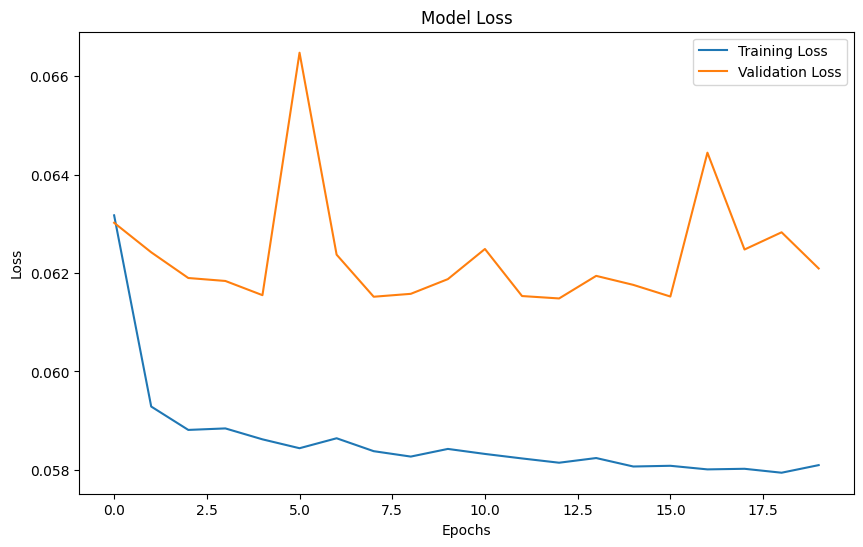

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Evaluating the Model

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


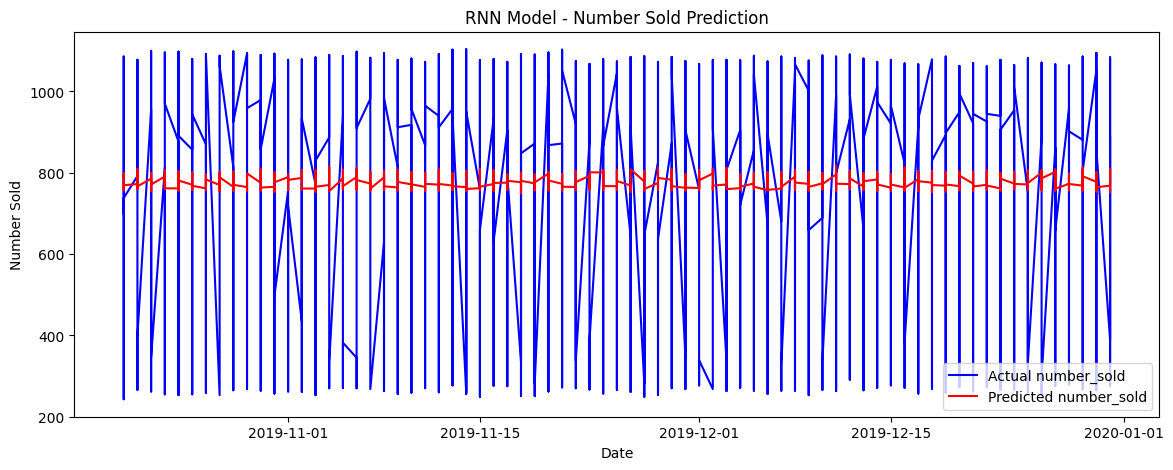

In [5]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(df['Date'][-len(y_test):], y_test_inv, color='blue', label='Actual number_sold')
plt.plot(df['Date'][-len(y_test):], y_pred_inv, color='red', label='Predicted number_sold')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.title('RNN Model - Number Sold Prediction')
plt.legend()
plt.show()
